# Cleaning data

- Cleaning Missing Value : drop, ignore, impute

In [ ]:
import pandas as pd

In [ ]:
checkout = pd.read_csv('/content/checkout.csv')

In [ ]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696


In [ ]:
#calculate the mean order value
checkout.order_value.mean()

30.009691759377244

In [ ]:
#replace missing values with zero and get mean
# (sometimes right somtimes not suitable)

checkout['order_value'].fillna(0).mean()

25.35818953667377

**Cleaning duplicates**

In [ ]:
#cleaning duplicates
print(len(checkout))

print(len(checkout.drop_duplicates(keep="first"))) #no duplicate in our data

9000
9000


In [ ]:
#unique users in group B
print(checkout[checkout['checkout_page']=='B']['user_id'].nunique())

#unique users who purchased at least once
#group by user_id _> get max of purchased -> and sum it!
print(checkout[checkout["checkout_page"]=="B"].groupby('user_id')['purchased'].max().sum())

#total purchase events in group B
# sum total purchase
print(checkout[checkout['checkout_page']=='B']['purchased'].sum())

2938
2491.0
2541.0


**EDA summary stats**

In [ ]:
#mean and count and standard deviations
checkout.groupby('checkout_page')['order_value'].agg({'mean','std','count'})

,mean,count,std
checkout_page,,,
A,24.956437,2461,2.418837
B,29.876202,2541,7.277644
C,34.917589,2603,4.869816


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0, 0.5, 'Order Value [$]')

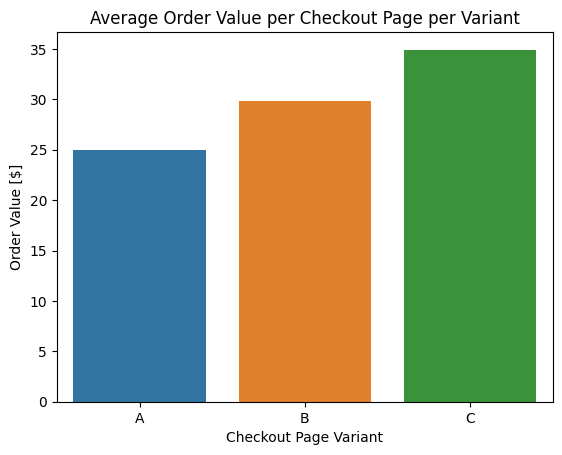

In [ ]:
sns.barplot(x=checkout['checkout_page'], y=checkout['order_value'],
            estimator=np.mean)
plt.title('Average Order Value per Checkout Page per Variant')
plt.xlabel('Checkout Page Variant')
plt.ylabel('Order Value [$]')


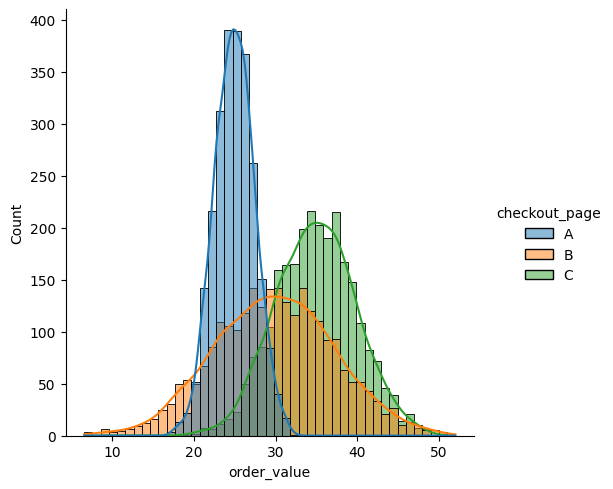

In [ ]:
#Historam
sns.displot(data=checkout,x="order_value", hue="checkout_page",kde=True)

In [ ]:
#timeseries
#sns.lineplot(data=adSmart,x="date",y="yes", hue="experiment", ci=False)

# **AB Testing SANITY CHECKS**

Simpson's paradox
a statistical phenomenon where certain trends between variables emerge, dissapear or reverse when the population is divided into segments

if you look at the example below there if look based on variant, variant A has higher cvr. but if divided by device b is has higher cvr.

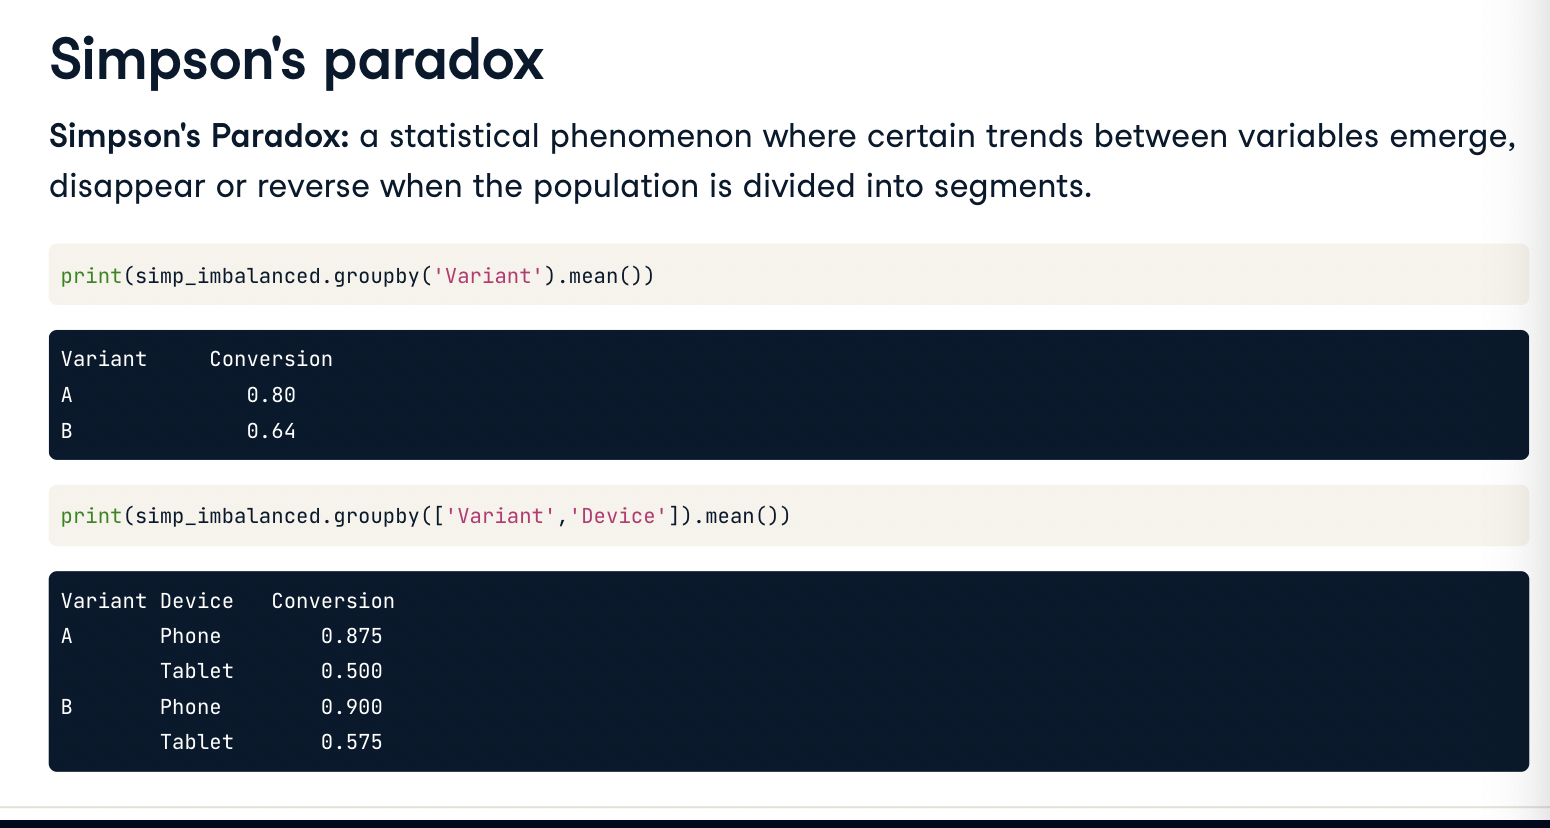

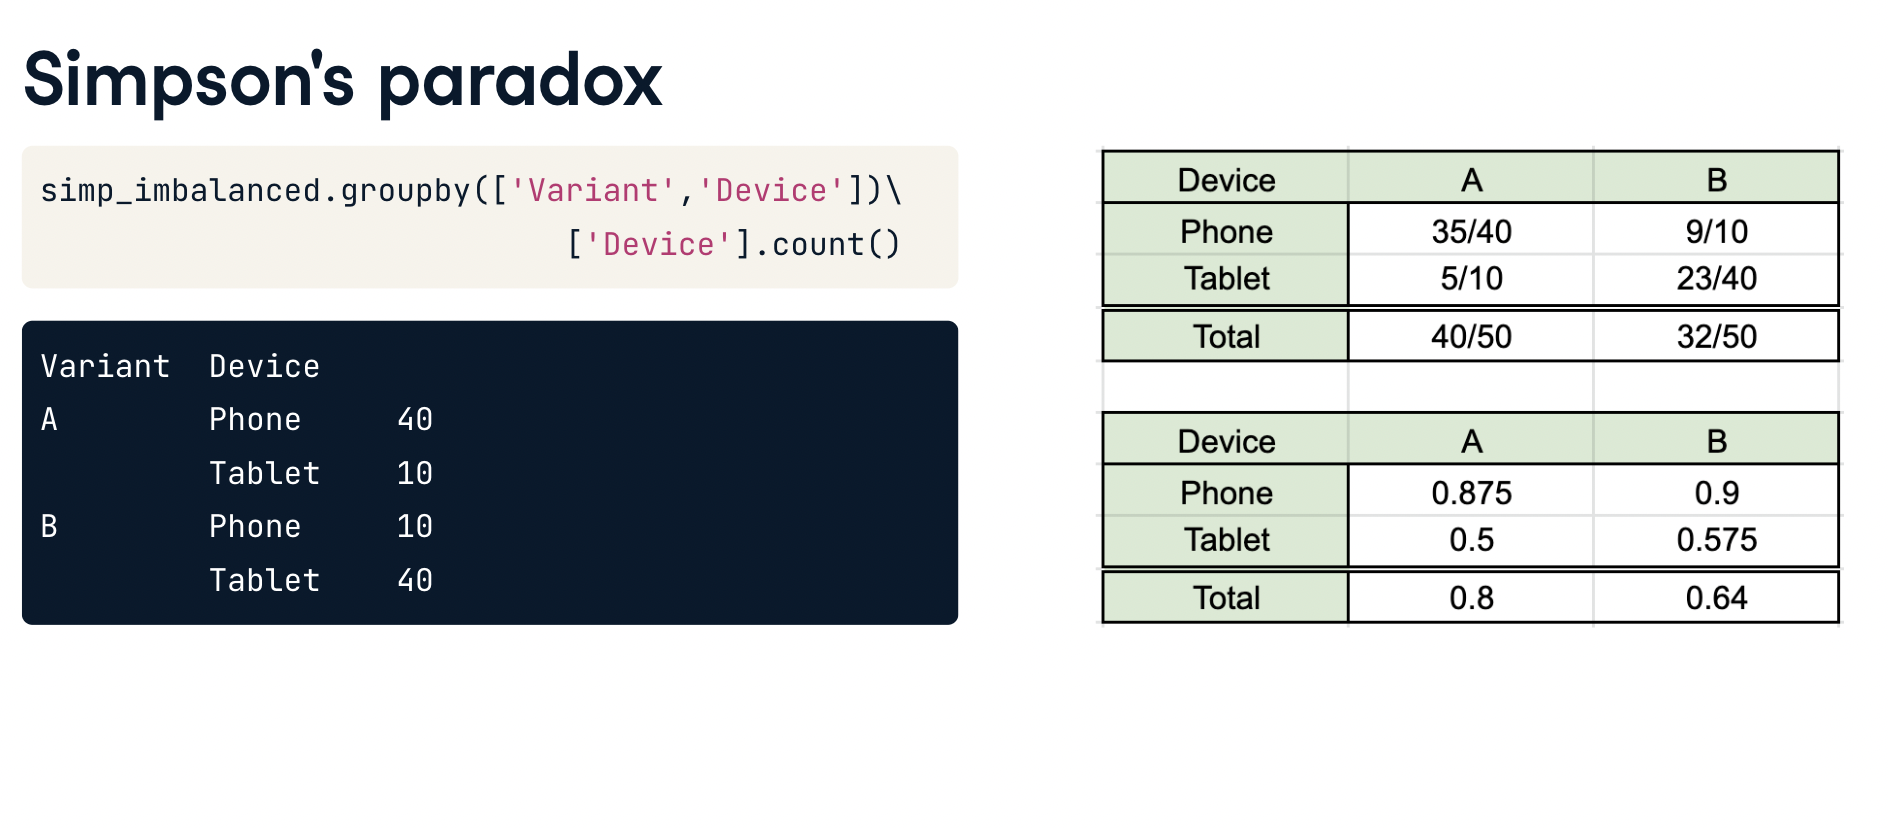

(Picture Source datacamp Ab test)

what happend is in variant A there are more phone users and phone users are most likely to convert. this test is not balanced

NOVELTY EFFECT
- a short lived improvement in metrics caused by user's curiosity about a new feature ( it looks like the new users works wonderfuly then died down in the future)

CHANGE AVERSION
- the opposite of novelty effect
- users avoiding trying a new feature due to familiarity with the old one

example of novelty effect:

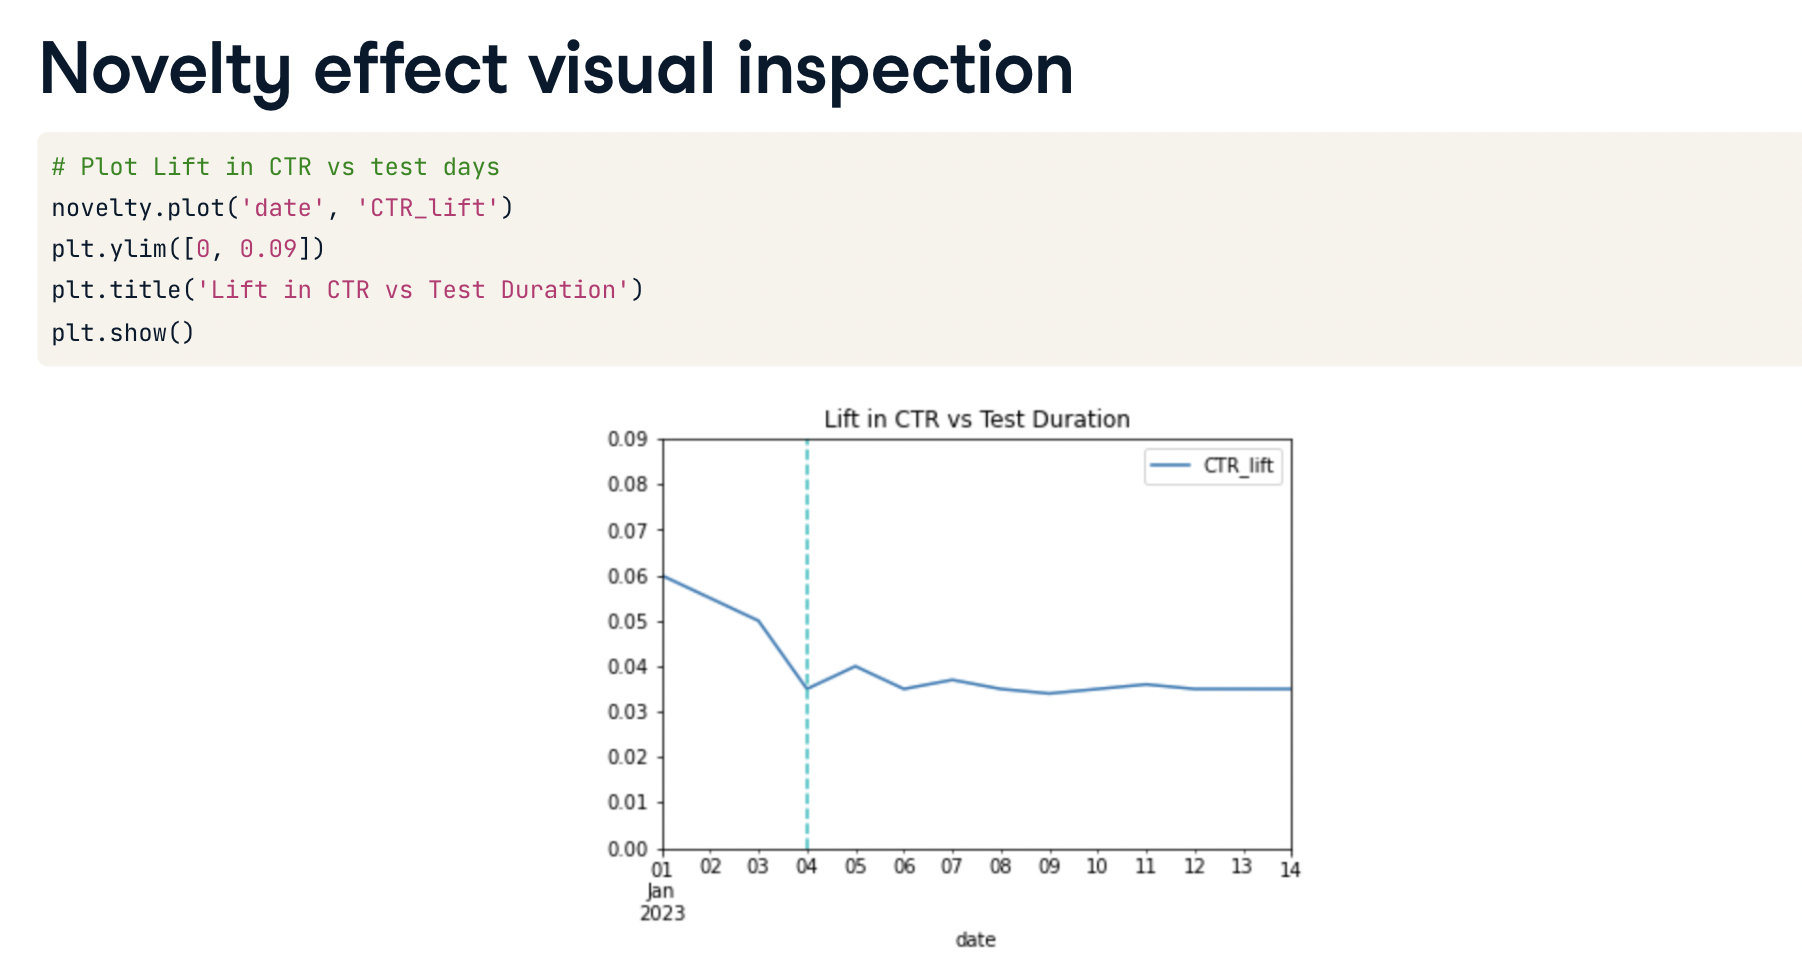

(Picture Source datacamp Ab test)

CORRECTING for novelty effects:

1. increasing the test duration
start including data after treatment effect stabilizes

2. examine new and returning user cohorts
- new users are by default less likely to experience novelty effects
- old users compare consider their old experience